# Fitting data in Python 

We often want to check whether our experimental data fits our theoretical understanding. After this short tutorial, you will be able to do the following things in Python:
* Define a linear function
* Fit a curve to some data using curve_fit

# Importing functionality with modules
We import the same modules as in the previous notebook. We also import a function called "curve_fit" from SciPy (Scientific Python). This is the function we use to fit models to our data. 

In [1]:
import numpy as np  # Numpy stands for "Numerical Python". It contains all the nice codes for manipulating data.
                    # Numpy is the fundamental package for scientific computing with Python: http://numpy.org/
                    # Numpy provides support to mathematically manipulate large, multi-dimensional arrays and matrices.
                    # By importing numpy "as np", we make sure that all numpy-related functions have np. in front of 
                    # them like this: np.function()
import matplotlib.pyplot as plt # Matplotlib.pyplot gives you code to make pretty graphs!
                                # Throughout your studies you will most likely use matplotlib.pyplot 
                                # to plot any graph you need to illustrate your research
                                # By importing pyplot "as plt", we make sure that all pyplot-related functions have 
                                # plt. in front of them like this: plt.function()
                
from scipy.optimize import curve_fit # Scipy is a HUGE library: it makes no sense to import everything!
                                     # So we only import the single function we need.

# Importing data
In the previous tutorials we have seen how to import data and how to plot those data:

Text(0,0.5,'Resistance (Ohm)')

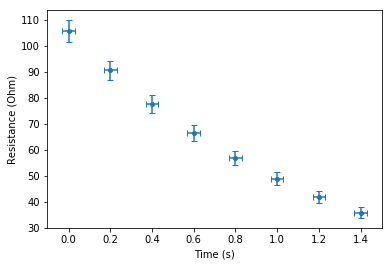

In [2]:
filename =  "201809Voorbeeldvervaltijdreelefout.csv"
time, voltage, time_err, voltage_err = np.loadtxt(filename, delimiter=",", unpack=True)

plt.figure()
plt.errorbar(time,voltage,xerr=time_err,yerr=voltage_err,fmt="o", markersize=4, capsize=3)
plt.xlabel("Time (s)")
plt.ylabel("Resistance (Ohm)")

# Linear Data
Often we have some expectation from theory about the relation between two quantities. For instance, the theory might predict an exponential relation between two quantities: \begin{equation*}I = I_0 \cdot e^{-t/t_0}\end{equation*} In an experiment, we often want to see two things. First, we want to know whether the theory does indeed describe the experiment. Secondly, we would like to know the values of the parameters in the theory. In this case the values for $I_0$ and $t_0$.

To this end, we try to create a curve given by the relation predicted by theory, which closely follows the experimental data points. This procedure is called fitting.

Before we can do the actual fit, we have to define a function that describes the theory. We have seen before that in python a function is something that accepts arguments and can return a value. Here we define our own function. The function accepts three variables and returns a value calculated with these variables.

To be able to see whether the function describes the experiment it is necessary to linearize your data. There are many advantages of linearizing data. Physically, linearizing exponential curves and power laws increases your *dynamic range*: you will be able to see very small changes, as well as very large changes, with the same accuracy. Practically, it is difficult to tell whether a graph of the data is exactly exponential (or any other non-linear function), or not, but much easier to see whether a graph is roughly linear or not. Mathematically, the statistics of linear fits are described much better than the statistics of non-linear fits.

To linearize your data, see section 0.9.2 in the lab manual. For example in the case of \begin{equation*}I = I_0 \cdot e^{-t/t_0}\end{equation*} one would not use $I$ and $t$ to do the curve_fit but instead we would use $ln(I)$ and $t$ which should have a linear relationship if the theory is correct. <i> One can check this by taking the natural logarithm of both sides of the equation: \begin{equation*}ln(I) = ln(I_0 \cdot e^{-t/t_0})\end{equation*}
\begin{equation*}ln(I) = -(1/t_0) \cdot t + ln(I_0)\end{equation*}
This function is linear in $t$ with $a = -(1/t_0)$ and $b = ln(I_0)$.

So to do a proper fit we will always use a linear function. We need to define that function first.

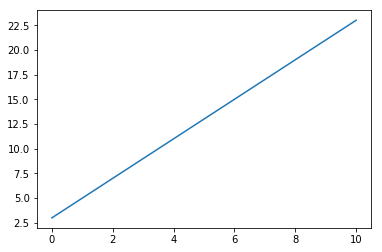

In [3]:
# Here we define a function. We will always use a linear function.
# If your data is not linear, linearize it: see section 0.9.2 from the lab manual.
def linear_function(x,a,b):
    return a*x + b

# Here we test the new function
x = np.linspace(0,10,100)
y=linear_function(x,2,3)
plt.plot(x,y)

# Fitting the line to our data
To make a fit we use the function curve_fit, which we imported in the first cell. The arguments for curve_fit are the function we would like to fit to, the x variables and the y variables.

The function curve_fit returns an array with optimal parameters popt and an array with covariances pcov.

In [4]:
# Here we calculate the optimal parameters
popt, pcov = curve_fit(linear_function, time, voltage, sigma=voltage_err, absolute_sigma=True)
# Sigma contains the errors
# Absolute_sigma = True tells scipy that we do NOT use relative erros
# This is essential! Otherwise pcov will contain garbage.

# Here we print the equation for the fitted curve
afit=popt[0]
bfit=popt[1]
print("yfit = "+str(afit)+" * t + "+str(bfit))

yfit = -46.22014179761221 * t + 97.56225573910642


To see whether the fit makes any sense we can plot it together with the original curve.

Text(0,0.5,'Resistance (Ohm)')

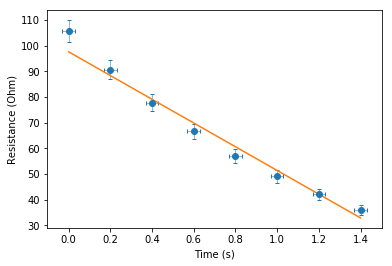

In [5]:
# Here we calculate the yvalues 
yfit = linear_function(time,afit,bfit)

plt.figure()
plt.errorbar(time,voltage,xerr=time_err,yerr=voltage_err,capsize=2,elinewidth=0.5,fmt="o")
plt.plot(time,yfit) #here we plot the fitted curve
plt.xlabel("Time (s)")
plt.ylabel("Resistance (Ohm)")

We also would like to know what the error on the fit parameters is. The curve_fit function also returned the variable pcov. This is the so called covariance matrix. On the diagonal of this matrix you can find the variance of the fit parameters. The variance is the square of the standard deviation. Therefore:

In [6]:
variance_a = pcov[0,0]
variance_b = pcov[1,1]

sigma_a = np.sqrt(variance_a)
sigma_b = np.sqrt(variance_b)

print("f = a * x + b")
print("with")
print("a = "+str(afit)+" ± "+str(sigma_a))
print("b = "+str(bfit)+" ± "+str(sigma_b))

f = a * x + b
with
a = -46.22014179761221 ± 2.276604383151824
b = 97.56225573910642 ± 2.2607208873625386


Even though the fit will come up with neat numbers for the fit, from the graph you can clearly tell that a linear fit does not work in this case.

We therefore need to manipulate the data (according to an underlying theory) to make the data linear. Since in this case we expect an exponential decay we can linearize the data by plotting $ln(R)$ against $Time$.

In [7]:
# Manipulate the data and the accompanying errors to make it linear.

lnVoltage = np.log(voltage)
lnVoltage_err = (1/voltage)*voltage_err

In [8]:
# Here we calculate the optimal parameters
popt, pcov = curve_fit(linear_function, time, lnVoltage,sigma=lnVoltage_err)

# Here we print the equation for the fitted curve
afit=popt[0]
bfit=popt[1]
print("yfit = "+str(afit)+" * t + "+str(bfit))

yfit = -0.7690989228453038 * t + 4.660420831728597


Text(0,0.5,'ln(Resistance) (ln(Ohm)')

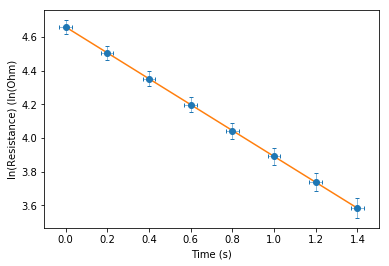

In [9]:
# Here we calculate the yvalues 
yfit = linear_function(time,afit,bfit)

plt.figure()
plt.errorbar(time,lnVoltage,xerr=time_err,yerr=lnVoltage_err,capsize=2,elinewidth=0.5,fmt="o")
plt.plot(time,yfit) #here we plot the fitted curve
plt.xlabel("Time (s)")
plt.ylabel("ln(Resistance) (ln(Ohm)")

<b>Check whether the linear fit now neatly follows the data.</b>

In [10]:
variance_a = pcov[0,0]
variance_b = pcov[1,1]

sigma_a = np.sqrt(variance_a)
sigma_b = np.sqrt(variance_b)

print("f = a * x + b")
print("with")
print("a = "+str(afit)+" ± "+str(sigma_a))
print("b = "+str(bfit)+" ± "+str(sigma_b))

f = a * x + b
with
a = -0.7690989228453038 ± 0.00022989732762927542
b = 4.660420831728597 ± 0.00016986368642559776


<b>Note that the errors in the returned values should now be much smaller than before!</b>

Also note that python returns values with many insignificant numbers and without units. Make sure that you report the values in the correct significant numbers and units in your labjournal/report.<BR>
<i>The error should never have more than 1 significant digit and the calculated value should be rounded off to the position of that error digit.</i>

<b>Now finish this fitprocedure and calculate the values of $t_0$ and $I_0$ for this data <i>including</i> their errors!</b>

In [11]:
# Your code here:


## Happy fitting!

In [12]:
# Your code here: try fitting some fictitious data for yourself
